In [1]:
# Initial libraries loaded in for analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import random

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Loading in the dataset
df = pd.read_csv("crs data.csv")

# Checking first few columns in the dataset
df.head()

,#,Date,Immigration program,Invitations issued,CRS score of lowest-ranked candidate invited
0,190,"May 31, 2021",Canadian Experience Class,5956,380
1,189,"May 26, 2021",Provincial Nominee Program,500,713
2,188,"May 20, 2021",Canadian Experience Class,1842,397
3,187,"May 13, 2021",Canadian Experience Class,4147,401
4,186,"May 12, 2021",Provincial Nominee Program,557,752


#### Quick Overview of Dataset


In [3]:
# Finding size of dataset
df.shape

(191, 5)

In [4]:
# Finding datatype
df.dtypes

#                                                int64
Date                                            object
Immigration program                             object
Invitations issued                              object
CRS score of lowest-ranked candidate invited     int64
dtype: object

**Note:** Columns properly recognized as appropriate datatypes with exception of Date which should be datetime object

In [5]:
# Converting datatype of Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
# Properly converting datatype of Invitations issued column to float
df['Invitations issued'] = df['Invitations issued'].str.replace(',','').astype(float)

In [7]:
# Checking number of unique values for each column
df.nunique()

#                                               190
Date                                            187
Immigration program                               5
Invitations issued                              123
CRS score of lowest-ranked candidate invited     98
dtype: int64

In [8]:
# Checking for any missing data
df.isnull().sum()

#                                               0
Date                                            0
Immigration program                             0
Invitations issued                              0
CRS score of lowest-ranked candidate invited    0
dtype: int64

In [9]:
# Simple descriptive statistics 
df.describe(include='all')

,#,Date,Immigration program,Invitations issued,CRS score of lowest-ranked candidate invited
count,191.000000,191,191,191.000000,191.000000
unique,NaN,187,5,NaN,NaN
top,NaN,2017-05-26 00:00:00,No program specified,NaN,NaN
freq,NaN,2,139,NaN,NaN
first,NaN,2015-01-31 00:00:00,NaN,NaN,NaN
last,NaN,2021-05-31 00:00:00,NaN,NaN,NaN
mean,95.476440,NaN,NaN,2660.162304,493.361257
std,54.848482,NaN,NaN,2326.325763,121.286917
min,1.000000,NaN,NaN,118.000000,75.000000
25%,48.500000,NaN,NaN,1013.500000,442.000000


In [10]:
# Box plot: to show distribution of CRS scores
# Bar plot: to show count of immigration programs
# Line graph: line graph of all the invitations issues by date
# Line graph: line graph of CRS scores by date
# Bar plot: to show which count of months which has the most programs issued
# Bar plot: to show which immigration program issued the most invitations by far
# Line graph: showing CRS score filtered by immigration program over time

#### Overview of the Immigration Program Issued

In [11]:
# Extracting year from datetime object 
df['year'] = df['Date'].dt.strftime("%Y")


In [12]:
df

,#,Date,Immigration program,Invitations issued,CRS score of lowest-ranked candidate invited,year
0,190,2021-05-31,Canadian Experience Class,5956.0,380,2021
1,189,2021-05-26,Provincial Nominee Program,500.0,713,2021
2,188,2021-05-20,Canadian Experience Class,1842.0,397,2021
3,187,2021-05-13,Canadian Experience Class,4147.0,401,2021
4,186,2021-05-12,Provincial Nominee Program,557.0,752,2021
...,...,...,...,...,...,...
186,5,2015-03-20,No program specified,1620.0,481,2015
187,4,2015-02-27,No program specified,1187.0,735,2015
188,3,2015-02-20,Canadian Experience Class,849.0,808,2015
189,2,2015-02-07,No program specified,779.0,818,2015


In [13]:
# Count of immigration programs 
df['Immigration program'].value_counts()

No program specified          139
Provincial Nominee Program     23
Canadian Experience Class      21
Federal Skilled Trades          7
Provincial Nominee Class        1
Name: Immigration program, dtype: int64

In [14]:
# PR Invitations Issued by Year
df.groupby(['year'])['Invitations issued'].sum().reset_index(name='counts')


,year,counts
0,2015,31063.0
1,2016,33782.0
2,2017,86023.0
3,2018,89800.0
4,2019,85300.0
5,2020,107350.0
6,2021,74773.0


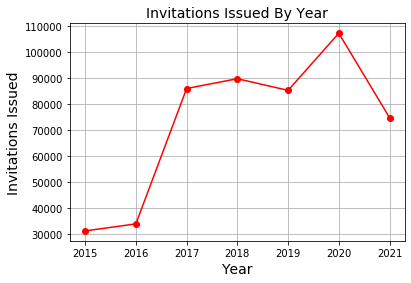

In [15]:
# Line plot of invitations issued by year
df_new = df.groupby(['year'])['Invitations issued'].sum().reset_index(name='counts')

plt.plot(df_new['year'], df_new['counts'], color='red', marker='o')
plt.title('Invitations Issued By Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Invitations Issued', fontsize=14)
plt.grid(True)
plt.show()

The number of PR invitations has been increasing steadily every year with 2020 being the record year with the most invitations issued. Its important to note that 2021 does not take into full year as 2021 data is only reflected up until May 31, 2021 and the invitations for 2021 is still ongoing. Despite 2021 not being a complete year, total of 74,773 PR invitations were issued under the IRCC programs which is very close to the total invitations issued in 2018, 2019. This is in line with Federal Government's announcement which stated that they aim to invite 401,000 new permanent residents in 2021. As a result, its clear that the number of invitations will most likely surpass the 2020 numbers and will reach new record in 2021. 

#### Overview of CRS Score

Comprehensive Ranking System (CRS) is a merit based points system that assigns score to potential PR candidates in Express Entry pool. IRCC determines the lowest CRS score threshold each draw and any candidates that are above the CRS score threshold are invited to apply for PR. As a result, exploring CRS score allows us to gain insight into the level of difficulty that potential candidates face when applying for PR.  

To find your score, please refer to link: https://www.cic.gc.ca/english/immigrate/skilled/crs-tool.asp

In [16]:
# Average score by year 
df_avg = df.groupby(['year'])['CRS score of lowest-ranked candidate invited'].mean().reset_index(name='average score')
df_avg

,year,average score
0,2015,538.043478
1,2016,491.333333
2,2017,442.833333
3,2018,448.500000
4,2019,450.807692
5,2020,533.864865
6,2021,563.700000


This is an interesting finding as the assumption was that the average CRS Score YoY would decrease as result of government's policy on increasing immigrants. Closer look reveals that the score may be skewed as the scores include scored from Provincial Nominee Prgram and Provincial Nominee Class where the nominated candidates from provinces receive additional 600 CRS score. As a result, average score will be determined again where the PNP and PNC programs will be filtered out.

In [17]:
# Excluding provincial nominee class and provincial nominee program
df_score = df[(df['Immigration program'] != 'Provincial Nominee Class') & (df['Immigration program'] != 'Provincial Nominee Program')]


In [18]:
df_score

,#,Date,Immigration program,Invitations issued,CRS score of lowest-ranked candidate invited,year
0,190,2021-05-31,Canadian Experience Class,5956.0,380,2021
2,188,2021-05-20,Canadian Experience Class,1842.0,397,2021
3,187,2021-05-13,Canadian Experience Class,4147.0,401,2021
5,185,2021-04-29,Canadian Experience Class,6000.0,400,2021
7,183,2021-04-16,Canadian Experience Class,6000.0,417,2021
...,...,...,...,...,...,...
186,5,2015-03-20,No program specified,1620.0,481,2015
187,4,2015-02-27,No program specified,1187.0,735,2015
188,3,2015-02-20,Canadian Experience Class,849.0,808,2015
189,2,2015-02-07,No program specified,779.0,818,2015


In [19]:
# Ensuring no PNP, PNC programs are included 
df_score['Immigration program'].value_counts()

No program specified         139
Canadian Experience Class     21
Federal Skilled Trades         7
Name: Immigration program, dtype: int64

In [20]:
df_excl = df_score.groupby(['year'])['CRS score of lowest-ranked candidate invited'].mean().reset_index(name='average score')
df_excl

,year,average score
0,2015,538.043478
1,2016,480.000000
2,2017,422.750000
3,2018,431.703704
4,2019,450.807692
5,2020,461.592593
6,2021,386.600000


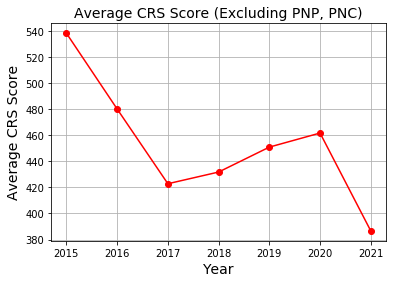

In [21]:
# Line plot of average CRS score excluding PNP, PNC

plt.plot(df_try_2['year'], df_try_2['average score'], color='red', marker='o')
plt.title('Average CRS Score (Excluding PNP, PNC)', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average CRS Score', fontsize=14)
plt.grid(True)
plt.show()

As expected, the CRS score excluding the PNP, PNC program shows that the score has been steadily decreasing, with 2021 being record low. Its also interesting to note that there was a significant drop in CRS score from 2015 to 2016. 

#### CRS score by class

To explore CRS score by the immigration program

In [22]:
# Finding Average CRS score for each year based on the program
df_v2 = df.groupby(["year","Immigration program"])['CRS score of lowest-ranked candidate invited'].mean().unstack(fill_value=0).reset_index().rename_axis(None, axis=1)



In [23]:
df_v2

,year,Canadian Experience Class,Federal Skilled Trades,No program specified,Provincial Nominee Class,Provincial Nominee Program
0,2015,808.0,0.0,525.772727,0.0,0.000000
1,2016,0.0,0.0,480.000000,0.0,786.000000
2,2017,0.0,220.0,438.346154,0.0,724.000000
3,2018,0.0,286.0,443.360000,0.0,902.000000
4,2019,0.0,344.5,459.666667,0.0,0.000000
5,2020,449.2,415.0,472.250000,0.0,729.000000
6,2021,386.6,0.0,0.000000,741.0,740.777778


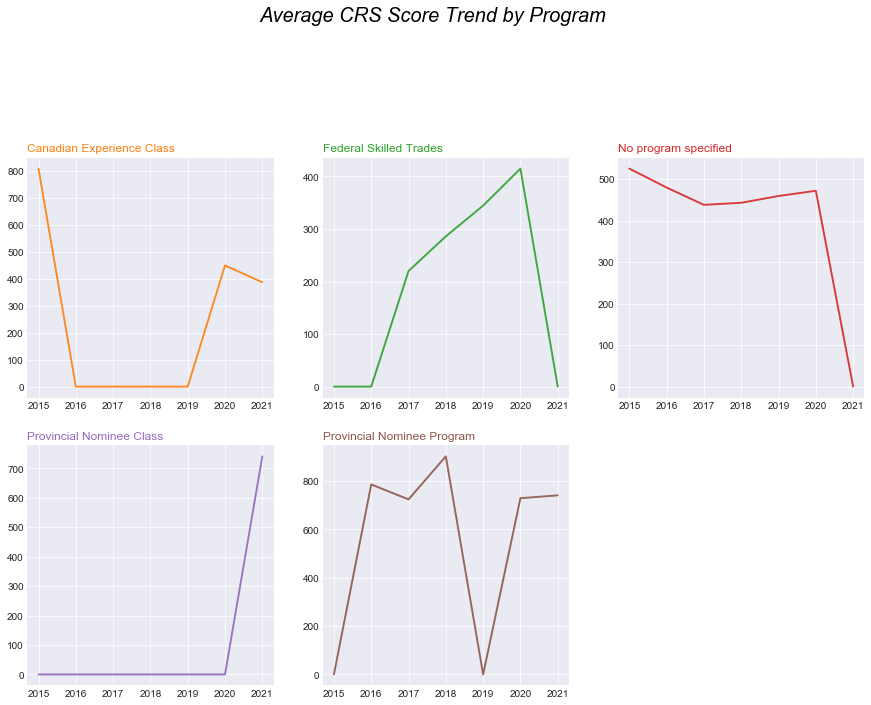

In [70]:
# Creating subplot
f, axs = plt.subplots(2,2,figsize=(15,15))

# Initialize the figure style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('tab10')
 
# multiple line plot
num=0
for column in df_v2.drop('year', axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(3,3, num)
 
    # Plot the lineplot
    plt.plot(df_v2['year'], df_v2[column], marker='', color=palette(num), linewidth=1.9, alpha=0.9, label=column)
     
    # Not ticks everywhere
    if num in range(7) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')
 
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )
    


# general title
plt.suptitle("Average CRS Score Trend by Program", fontsize=20, fontweight=0, color='black', style='italic', y=1.02)
 
# Show the graph
plt.show()

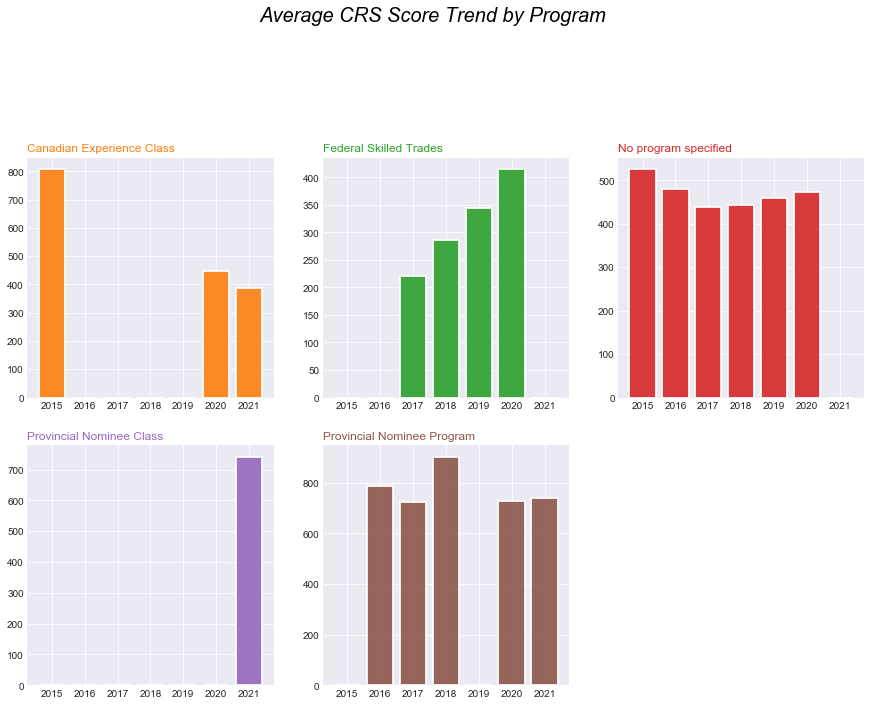

In [71]:
# Creating subplot
f, axs = plt.subplots(2,2,figsize=(15,15))

# Initialize the figure style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('tab10')
 
# multiple line plot
num=0
for column in df_v2.drop('year', axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(3,3, num)
 
    # Plot the lineplot
    plt.bar(df_v2['year'], df_v2[column], color=palette(num), linewidth=1.9, alpha=0.9, label=column)
     
    # Not ticks everywhere
    if num in range(7) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')
 
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )
    


# general title
plt.suptitle("Average CRS Score Trend by Program", fontsize=20, fontweight=0, color='black', style='italic', y=1.02)
 
# Show the graph
plt.show()

Please note that any 0 scores means the immigration program has not occured in that given year. 

#### Box plot

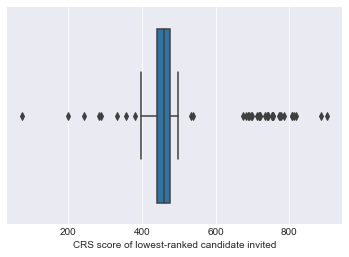

In [25]:
# Plotting box plot of total intl calls using sns.boxplot
sns.boxplot(x='CRS score of lowest-ranked candidate invited', data=df)

#### Immigration Program Occurences

In [26]:
df['Immigration program'].value_counts()

No program specified          139
Provincial Nominee Program     23
Canadian Experience Class      21
Federal Skilled Trades          7
Provincial Nominee Class        1
Name: Immigration program, dtype: int64

In [27]:
# No Program specified is a general program that encompasses all 4 programs, will be changed to General Program
df.loc[df['Immigration program'] == "No program specified", "Immigration program"] = "General Program"


In [28]:
df['Immigration program'].value_counts()

General Program               139
Provincial Nominee Program     23
Canadian Experience Class      21
Federal Skilled Trades          7
Provincial Nominee Class        1
Name: Immigration program, dtype: int64

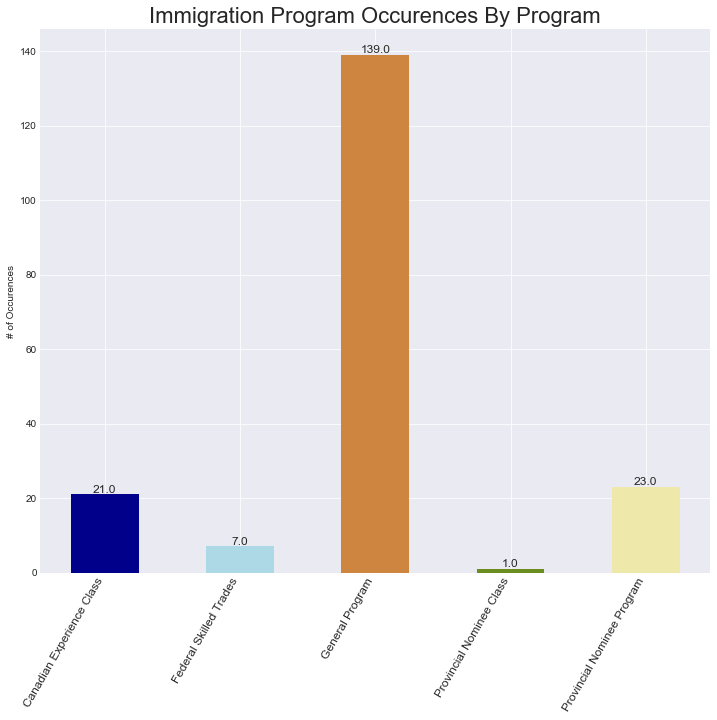

In [29]:
# Preparing Data
df_1 = df.groupby('Immigration program').size().reset_index(name='counts')
n = df_1['Immigration program'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure(figsize=(12,10))
plt.bar(df_1['Immigration program'], df_1['counts'], color=c, width=.5)
for i, val in enumerate(df_1['counts'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.gca().set_xticklabels(df_1['Immigration program'], rotation=60, horizontalalignment= 'right', fontsize=12)
plt.title("Immigration Program Occurences By Program", fontsize=22)
plt.ylabel('# of Occurences')
plt.show()

#### Program Occurences by Month

Determining how many programs happen each month

In [30]:
df.dtypes

#                                                        int64
Date                                            datetime64[ns]
Immigration program                                     object
Invitations issued                                     float64
CRS score of lowest-ranked candidate invited             int64
year                                                    object
dtype: object

In [31]:
df

,#,Date,Immigration program,Invitations issued,CRS score of lowest-ranked candidate invited,year
0,190,2021-05-31,Canadian Experience Class,5956.0,380,2021
1,189,2021-05-26,Provincial Nominee Program,500.0,713,2021
2,188,2021-05-20,Canadian Experience Class,1842.0,397,2021
3,187,2021-05-13,Canadian Experience Class,4147.0,401,2021
4,186,2021-05-12,Provincial Nominee Program,557.0,752,2021
...,...,...,...,...,...,...
186,5,2015-03-20,General Program,1620.0,481,2015
187,4,2015-02-27,General Program,1187.0,735,2015
188,3,2015-02-20,Canadian Experience Class,849.0,808,2015
189,2,2015-02-07,General Program,779.0,818,2015


In [32]:
df['month'] = df['Date'].dt.strftime('%b')

df_2 = df.groupby('month').size().reset_index(name='counts')

df_mapping = pd.DataFrame({
    'size': ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
             "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],})
sort_mapping = df_mapping.reset_index().set_index('size')

df_2['size_num'] = df_2['month'].map(sort_mapping['index'])

df_2 = df_2.sort_values('size_num')

In [33]:
df_2

,month,counts,size_num
4,Jan,18,0
3,Feb,14,1
7,Mar,17,2
0,Apr,22,3
8,May,24,4
6,Jun,14,5
5,Jul,12,6
1,Aug,15,7
11,Sep,14,8
10,Oct,13,9


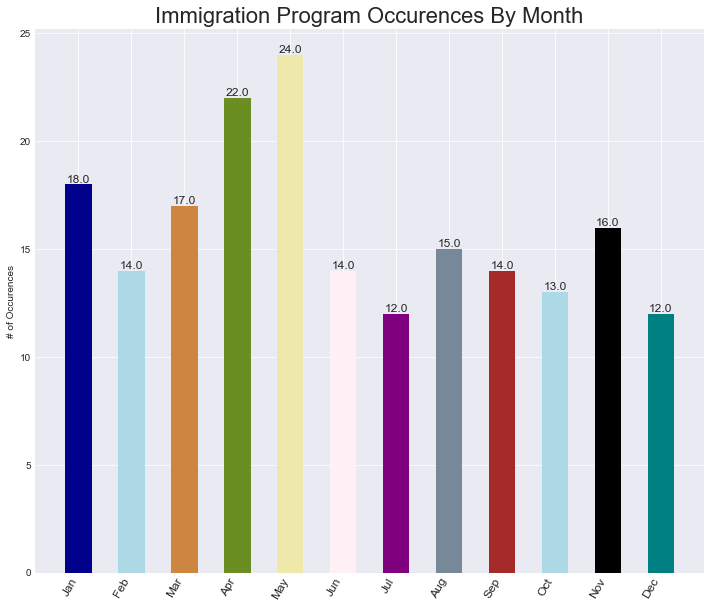

In [34]:
n = df_2['month'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure(figsize=(12,10))
plt.bar(df_2['month'], df_2['counts'], color=c, width=.5, )
for i, val in enumerate(df_2['counts'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.gca().set_xticklabels(df_2['month'], rotation=60, horizontalalignment= 'right', fontsize=12)
plt.title("Immigration Program Occurences By Month", fontsize=22)
plt.ylabel('# of Occurences')
plt.show()

#### Actual Invitations issued by month



In [35]:
df_mapping = pd.DataFrame({
    'size': ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
             "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],})
sort_mapping = df_mapping.reset_index().set_index('size')

df_2['size_num'] = df_2['month'].map(sort_mapping['index'])

df_2 = df_2.sort_values('size_num')

In [62]:
df_mon = df.groupby(['month'])['Invitations issued'].sum().reset_index(name='Invitations issued')


df_mapping = pd.DataFrame({
    'size': ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
             "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],})
sort_mapping = df_mapping.reset_index().set_index('size')

df_mon['size_num'] = df_mon['month'].map(sort_mapping['index'])

df_mon = df_mon.sort_values('size_num')

In [63]:
df_mon

,month,Invitations issued,size_num
4,Jan,48422.0,0
3,Feb,58395.0,1
7,Mar,39555.0,2
0,Apr,58000.0,3
8,May,50528.0,4
6,Jun,30772.0,5
5,Jul,30301.0,6
1,Aug,36469.0,7
11,Sep,38593.0,8
10,Oct,36412.0,9


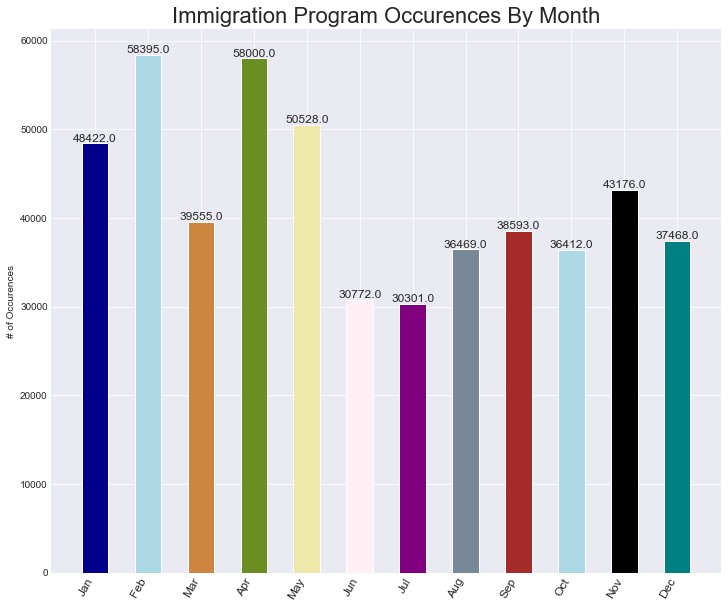

In [64]:
n = df_mon['month'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure(figsize=(12,10))
plt.bar(df_mon['month'], df_mon['Invitations issued'], color=c, width=.5, )
for i, val in enumerate(df_mon['Invitations issued'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.gca().set_xticklabels(df_2['month'], rotation=60, horizontalalignment= 'right', fontsize=12)
plt.title("Immigration Program Occurences By Month", fontsize=22)
plt.ylabel('# of Occurences')
plt.show()

#### Assessing seasonality

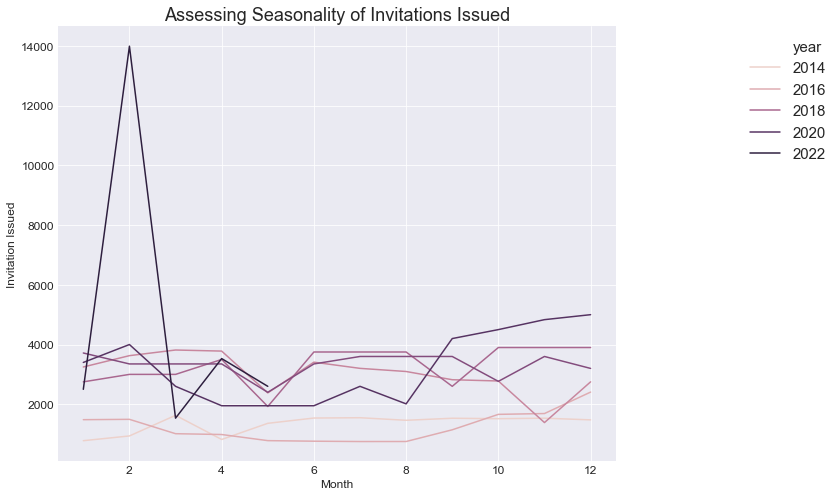

In [41]:
fig, ax = plt.subplots(figsize=(10, 8))

lp = sns.lineplot(data=df, x="month_num", y="Invitations issued", hue="year", ci=None)
lp.legend(loc='upper right', bbox_to_anchor=(1.4, 1), fontsize = 15)


sns.set_style("whitegrid")
lp.axes.set_title("Assessing Seasonality of Invitations Issued",fontsize=18)
lp.set_xlabel("Month",fontsize=12)
lp.set_ylabel("Invitation Issued",fontsize=12)
lp.tick_params(labelsize=12)



In [42]:
df

,#,Date,Immigration program,Invitations issued,CRS score of lowest-ranked candidate invited,year,month,month_num
0,190,2021-05-31,Canadian Experience Class,5956.0,380,2021,May,5
1,189,2021-05-26,Provincial Nominee Program,500.0,713,2021,May,5
2,188,2021-05-20,Canadian Experience Class,1842.0,397,2021,May,5
3,187,2021-05-13,Canadian Experience Class,4147.0,401,2021,May,5
4,186,2021-05-12,Provincial Nominee Program,557.0,752,2021,May,5
...,...,...,...,...,...,...,...,...
186,5,2015-03-20,General Program,1620.0,481,2015,Mar,3
187,4,2015-02-27,General Program,1187.0,735,2015,Feb,2
188,3,2015-02-20,Canadian Experience Class,849.0,808,2015,Feb,2
189,2,2015-02-07,General Program,779.0,818,2015,Feb,2


#### Which imimgration program issued the most invitations by far

In [43]:
df.groupby(['Immigration program'])['Invitations issued'].sum()

Immigration program
Canadian Experience Class     105717.0
Federal Skilled Trades          3055.0
General Program               389222.0
Provincial Nominee Class         374.0
Provincial Nominee Program      9723.0
Name: Invitations issued, dtype: float64

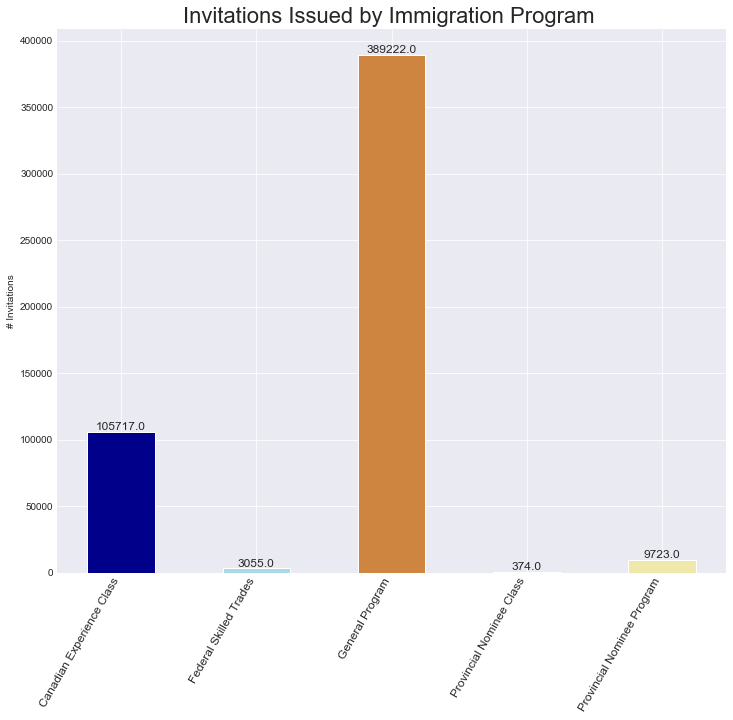

In [57]:
# Preparing Data
df_4 = df.groupby('Immigration program')['Invitations issued'].sum().reset_index(name='Invitations issued')
n = df_4['Immigration program'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure(figsize=(12,10))
plt.bar(df_4['Immigration program'], df_4['Invitations issued'], color=c, width=.5)
for i, val in enumerate(df_4['Invitations issued'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.gca().set_xticklabels(df_4['Immigration program'], rotation=60, horizontalalignment= 'right', fontsize=12)
plt.title("Invitations Issued by Immigration Program ", fontsize=22)
plt.ylabel('# Invitations')
plt.show()